In [1]:
import os
import shutil
import glob
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
# Pandas for managing datasets
import pandas as pd
import numpy as np
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
# Seaborn for plotting and styling
import seaborn as sns


In [4]:
if len(glob.glob('ships')) == 0 :
    all_ships =  pd.read_csv("../data/resultsMediteranian_withRouteID_proper.csv")
    all_ships.sort_values('TIMESTAMP',inplace=True)
    all_ships = all_ships.reset_index(drop=True)
    ships_ids = all_ships["SHIP_ID"]
    unq_ships_ids = set(ships_ids)
    print(unq_ships_ids)
    os.makedirs('ships')
    for x in unq_ships_ids:
        ship_data = all_ships['SHIP_ID'] == x
        ship = all_ships[ship_data][["TIMESTAMP","SHIPNAME","LAT","LON","HEADING"]]
        filename = 'ships/'+str(ship.iloc[0]["SHIPNAME"])+'.csv'
        ship.to_csv(path_or_buf=filename,index=False)
else:
    files = glob.glob("ships/*.csv")
    for file in files:
        ship =  pd.read_csv(file)
        shipname = ship.loc[0]["SHIPNAME"]
        ship = ship [["TIMESTAMP","LAT","LON","HEADING"]]
        ship.sort_values('TIMESTAMP',inplace=True)
        ship=ship.reset_index(drop=True)
        fig, ax = plt.subplots()
        fig.set_size_inches(30, 20)
        ax.set_ylabel('Latitute', fontsize = 20.0) # Y label
        ax.set_xlabel('Longitude ', fontsize = 20.0) # X label
        ax.set_title(shipname)
        # Plot using Seaborn
        sns.lineplot(x='LON', y='LAT', data=ship.head(750), ax=ax,sort=False,marker="o")

{306858, 460780, 297166, 280380, 376767}


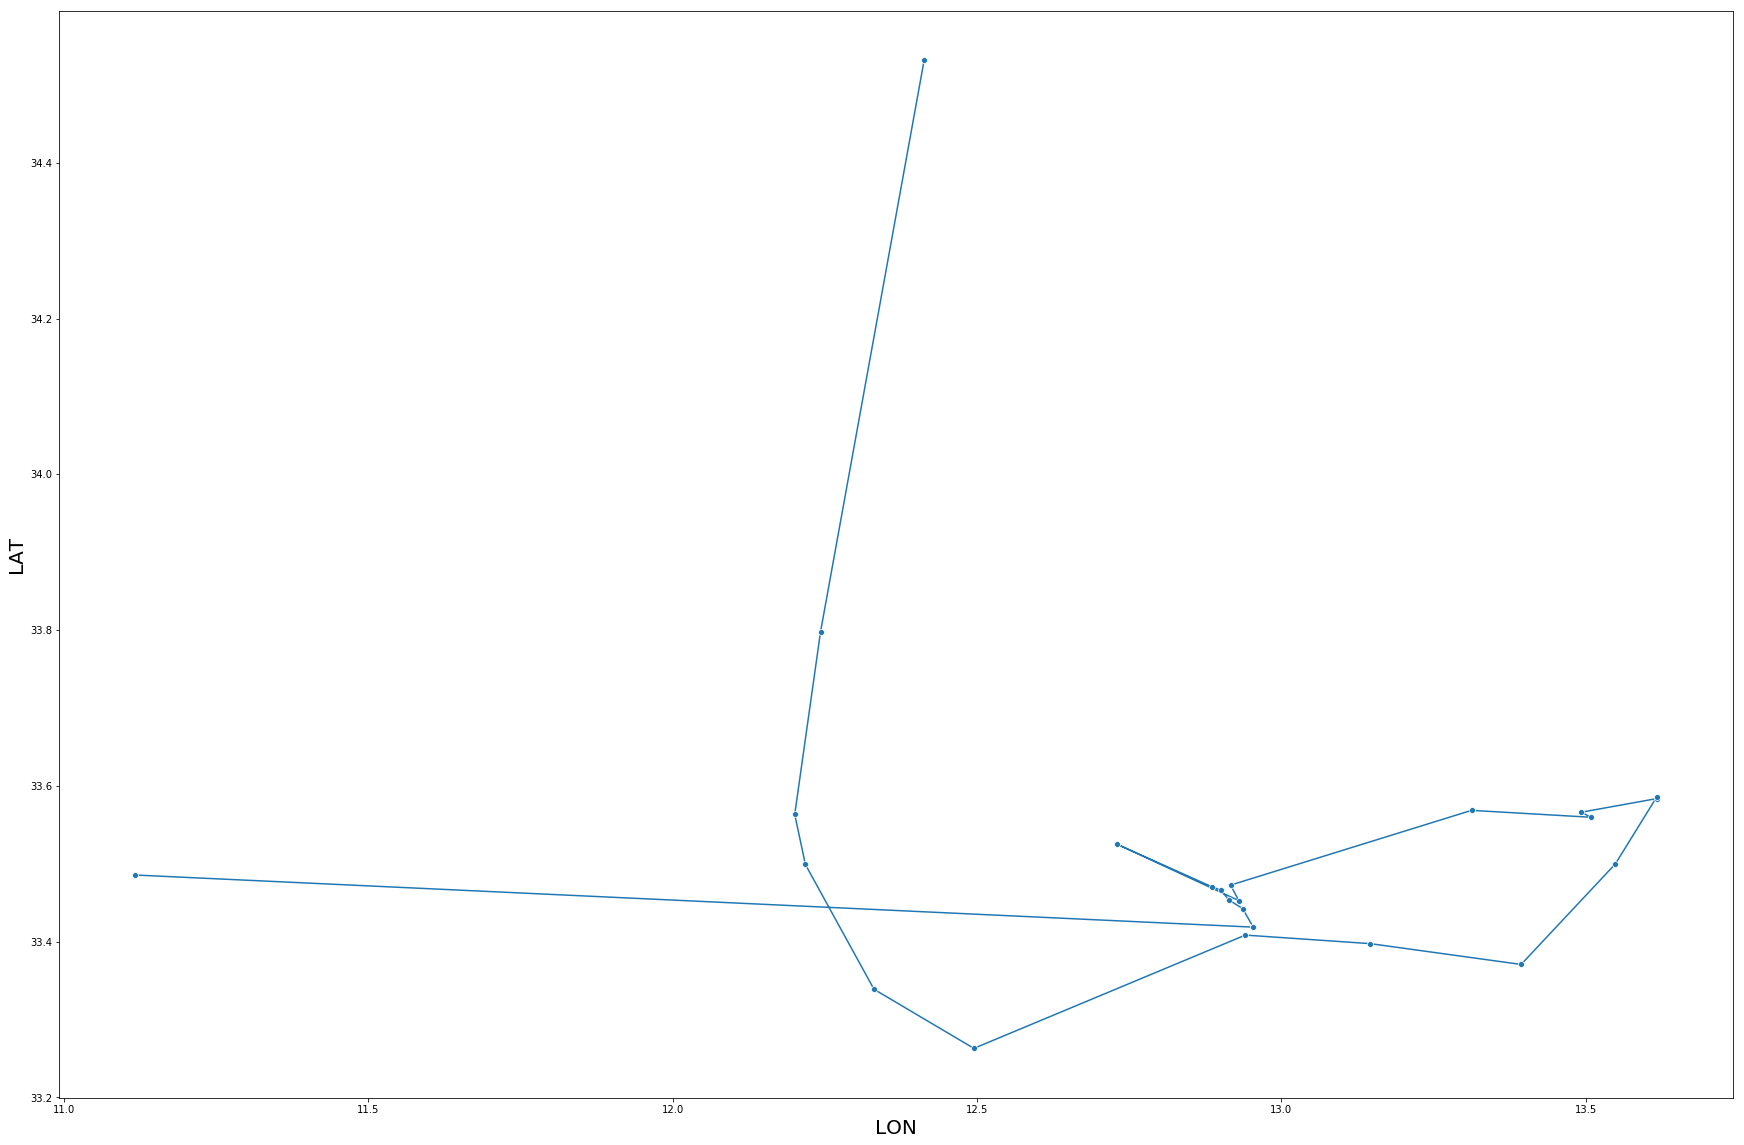

In [5]:
ship =  pd.read_csv("ships/BOURBON ARGOS.csv")
ship = ship [["TIMESTAMP","LAT","LON","HEADING"]]
ship.sort_values('TIMESTAMP',inplace=True)
ship=ship.reset_index(drop=True)
from tools.utils import scale_down
sd_data = scale_down(ship.head(750),25)
fig, ax = plt.subplots()
fig.set_size_inches(30, 20)
ax.set_ylabel('Latitute', fontsize = 20.0) # Y label
ax.set_xlabel('Longitude ', fontsize = 20.0) # X label
# Plot using Seaborn
sns.lineplot(x='LON', y='LAT', data=sd_data, ax=ax,sort=False,marker="o")


In [3]:
# all_ships =  pd.read_csv("../data/resultsMediteranian_withRouteID.csv",sep=";")
# print(all_ships.head(2))
# print(all_ships.shape)
# all_ships.sort_values('TIMESTAMP',inplace=True)
# all_ships = all_ships.reset_index(drop=True)
# import locale
# from locale import atof
# locale.setlocale(locale.LC_NUMERIC, '')
# all_ships['LAT'] = all_ships['LAT'].apply(atof)
# all_ships['LON'] = all_ships['LON'].apply(atof)
# print(all_ships.head(2))
# all_ships.to_csv(path_or_buf="../data/resultsMediteranian_withRouteID_proper.csv",index=False)
# print(all_ships.shape)
# all_ships =  pd.read_csv("../data/resultsMediteranian_withRouteID_proper.csv")
# print(all_ships.head(2))
# print(all_ships.shape)


       IMO             TYPE_NAME    SHIPNAME  SHIP_ID  \
0  7302225         Supply Vessel   DIGNITY I   460780   
1  9510307  Offshore Supply Ship  SIEM PILOT   306858   

                 TIMESTAMP  HEADING  COURSE       LAT       LON  SPEED  \
0  2015-07-06 13:55:12,000      170     261  33,53707  12,06114     11   
1  2015-07-06 14:03:45,000       39      38   36,4847  18,27072     98   

                  ...                  ARRIVAL_PORTID  \
0                 ...                            1028   
1                 ...                             525   

       DEPARTURE_TIMESTAMP        ARRIVAL_TIMESTAMP  DEPARTURE_PORT_NAME  \
0  2015-07-01 14:07:00,000  2015-07-09 07:59:00,000               LICATA   
1  2015-07-01 11:17:00,000  2015-07-09 11:46:00,000              CATANIA   

   DEP_PORT_TYPE DEP_COUNTRY_CODE ARRIVAL_PORT_NAME ARR_PORT_TYPE  \
0              P               IT           TRAPANI             P   
1              P               IT           CATANIA             P 

In [ ]:
# a =  pd.read_csv("ships/SIEM PILOT.csv")
# shipname = a.loc[0]["SHIPNAME"]
# a = a [["TIMESTAMP","LAT","LON","HEADING"]]
# a['TIMESTAMP'] = pd.to_datetime(a['TIMESTAMP'])  
# a.sort_values('TIMESTAMP',inplace=True)
# labels = ["TIMESTAMP","LAT","LON","HEADING"]
# real_data =  pd.read_csv("../data/route.csv")
# real_data = real_data [labels][:500]
# real_data['TIMESTAMP'] = pd.to_datetime(real_data['TIMESTAMP'])
# real_data.sort_values('TIMESTAMP',inplace=True)
# real_data=real_data.reset_index(drop=True)
# start = real_data.head(1)["TIMESTAMP"].values
# end = real_data.tail(1)["TIMESTAMP"].values
# date_mask = (a["TIMESTAMP"].values>start) & (a["TIMESTAMP"].values<=end)
# a[date_mask]